In [ ]:
from math import sin,cos,sqrt,pi
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np

#initialize presets for part 1
gamma = pi/2
L1 = 2
L2 = sqrt(2)
L3 = L2
p1 = sqrt(5)
p2 = p1
p3 = p2
x1 = 4
x2 = 0
y2 = 4

In [ ]:
#the polynomial to be solved
def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

#gives us x and y from a given value of theta.
def ans(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  x = N1/D
  y = N2/D
  return [x,y]

In [ ]:
f(-pi/4)

-2.2737367544323206e-13

The trigonometric polynomial is reliably depicted, and the test case returns a number on the order of 10⁻¹³

In [ ]:
print(fsolve(f,1))
print(fsolve(f,-1))
print(pi/4)

[0.78539816]
[-0.78539816]
0.7853981633974483


The out-of-the-box solving algorithm concurs with this result

Implementing the bisection method root finding algorithm, we find:

In [ ]:
def bisection(f, bottom, top, iterations):
  intvl = [bottom,top]
  vals = [f(intvl[0]),f(intvl[1])]
  for i in range(iterations):
    mid = sum(intvl)/2
    valat = f(mid)
    if valat*vals[0] < 0:
      intvl[1] = mid
      vals[1] = valat
    else:
      intvl[0] = mid
      vals[0] = valat
  guess = sum(intvl)/2
  return [guess, f(guess)]

print(bisection(f, -pi, 0, 200))
print(bisection(f, 0, pi, 200))

[-0.7853981633974485, -2.2737367544323206e-13]
[0.785398163397449, 1.8189894035458565e-12]


this accords with the out-of-the-box solver and with the expected values.

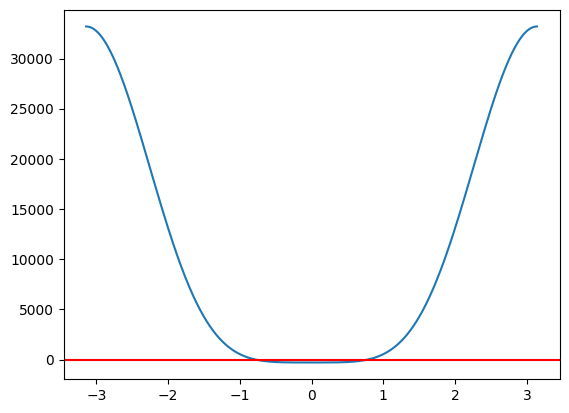

In [ ]:
vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)
plt.plot(x,y)
plt.axhline(color='red')

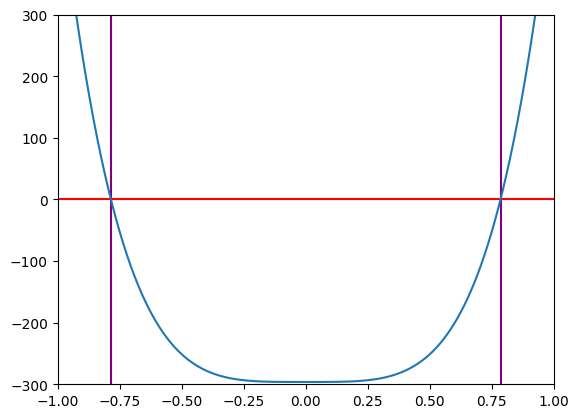

In [ ]:
plt.xlim(-1,1)
plt.ylim(-300,300)
plt.axhline(color='red')
plt.axvline(x=pi/4,color="purple")
plt.axvline(x=-pi/4,color="purple")
plt.plot(x,y)

You can clearly see the two intersections at ±pi/4 ≈ ±0.75. The vertical purple lines intersect the horizontal x=0 line, which graphically evidence the correctness of the roots.

[2.0, 1.0]


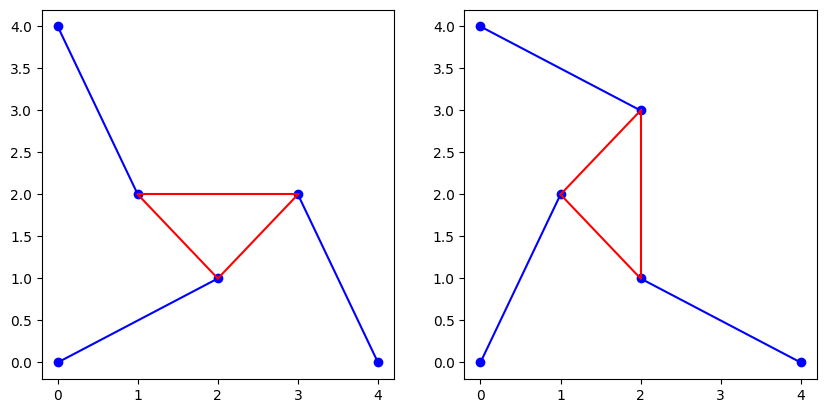

In [ ]:
plt.figure().set_figwidth(10)

#our presets are already set and we already know the roots. We just create our list of points and then plot them and the struts connecting them.
th = pi/4
xy = ans(th)
x = xy[0]
y = xy[1]
points = [[0,0],[x1,0],[x2,y2],[x,y],[x+L3*cos(th),y+L3*sin(th)],[x+L2*cos(th+gamma),y+L2*sin(th+gamma)]]

plt.subplot(1,2,1)

plt.plot(*zip(*points), 'bo')

plt.plot([0,x],[0,y], color = "blue")
plt.plot([x1,x+L3*cos(th)],[0,y+L3*sin(th)], color = "blue")
plt.plot([x2,x+L2*cos(th+gamma)],[y2,y+L2*sin(th+gamma)], color = "blue")

plt.plot([x,x+L3*cos(th)],[y,y+L3*sin(th)], color="red")
plt.plot([x+L3*cos(th),x+L2*cos(th+gamma)],[y+L3*sin(th),y+L2*sin(th+gamma)], color="red")
plt.plot([x,x+L2*cos(th+gamma)],[y,y+L2*sin(th+gamma)], color="red")
print(xy)

th = -pi/4
xy = ans(th)
x = xy[0]
y = xy[1]
points = [[0,0],[x1,0],[x2,y2],[x,y],[x+L3*cos(th),y+L3*sin(th)],[x+L2*cos(th+gamma),y+L2*sin(th+gamma)]]

plt.subplot(1,2,2)

plt.plot(*zip(*points), 'bo')

plt.plot([0,x],[0,y], color = "blue")
plt.plot([x1,x+L3*cos(th)],[0,y+L3*sin(th)], color = "blue")
plt.plot([x2,x+L2*cos(th+gamma)],[y2,y+L2*sin(th+gamma)], color = "blue")

plt.plot([x,x+L3*cos(th)],[y,y+L3*sin(th)], color="red")
plt.plot([x+L3*cos(th),x+L2*cos(th+gamma)],[y+L3*sin(th),y+L2*sin(th+gamma)], color="red")
plt.plot([x,x+L2*cos(th+gamma)],[y,y+L2*sin(th+gamma)], color="red")



This concludes parts 1-3 of the assignment, having correctly implemented the function and reconstructed the figure 1.15, using the solutions ±pi/4 which give us two solutions obtained by reflecting one another across the line y=x

In [ ]:
#part 4 presets
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p2 = p1
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

def ans(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  x = N1/D
  y = N2/D
  return [x,y]

New configuration, this time for part 4 of the assignment.

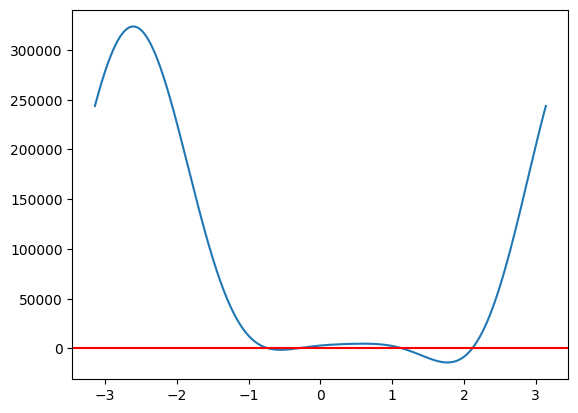

In [ ]:
vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)
plt.plot(x,y)
plt.axhline(color='red')

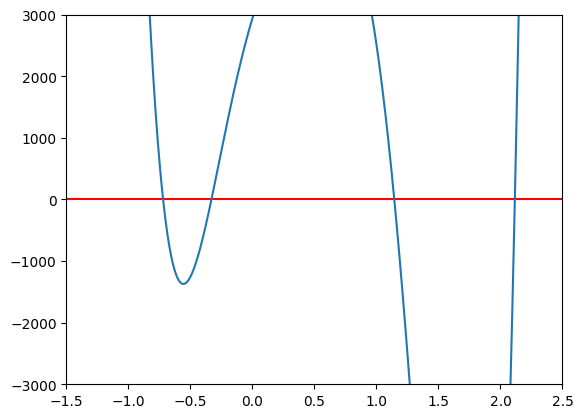

In [ ]:
plt.xlim(-1.5,2.5)
plt.ylim(-3000,3000)
plt.axhline(color='red')
plt.plot(x,y)

You can clearly see with this configuration that there are four configurations, with theta values very approximately [-1,-0.2,1,2] or so. Root finding will get more specific.

In [ ]:
#the bisection method, with inputs of the function to find the roots of, the bottom and top of the starting region, and the number of iterations.
def bisection(f, bottom, top, iterations):
  intvl = [bottom,top]
  vals = [f(intvl[0]),f(intvl[1])]
  for i in range(iterations):
    mid = sum(intvl)/2
    valat = f(mid)
    if valat*vals[0] < 0:
      intvl[1] = mid
      vals[1] = valat
    else:
      intvl[0] = mid
      vals[0] = valat
  guess = sum(intvl)/2
  return [guess, f(guess)]

solutions = []
solutions.append(bisection(f,-1.0,-0.5,200)[0])
solutions.append(bisection(f,-0.5,0.0,200)[0])
solutions.append(bisection(f,1.0,1.5,200)[0])
solutions.append(bisection(f,2.0,2.5,200)[0])
print(solutions)

[-0.7208492044603858, -0.3310051842838696, 1.1436855178213738, 2.115909014086462]


In [ ]:
for i in range(4):
  athand = solutions[i]
  print("the solution theta = " + str(athand) + " corresponds to x,y = " + str(ans(athand)))

the solution theta = -0.7208492044603858 corresponds to x,y = [-1.3783796305976996, 4.806253176222964]
the solution theta = -0.3310051842838696 corresponds to x,y = [-0.9147087168343386, 4.9156187772596125]
the solution theta = 1.1436855178213738 corresponds to x,y = [4.48175006539903, 2.2167355167668954]
the solution theta = 2.115909014086462 corresponds to x,y = [4.571830175332457, 2.0244428487659603]


[-1.3783796305976996, 4.806253176222964]
[-0.9147087168343386, 4.9156187772596125]
[4.48175006539903, 2.2167355167668954]
[4.571830175332457, 2.0244428487659603]


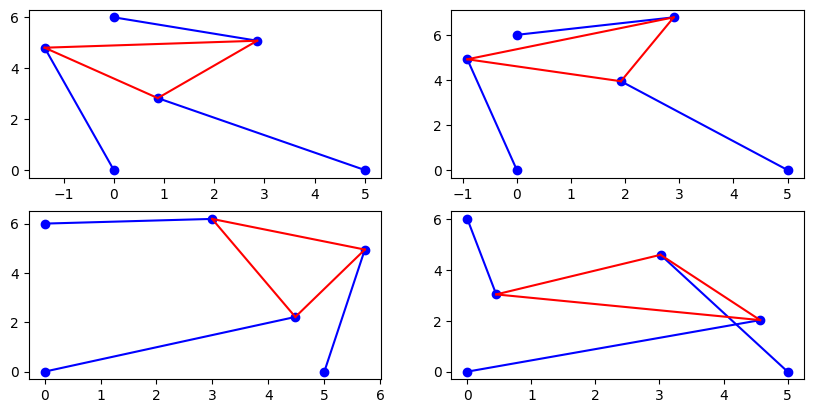

In [ ]:
plt.figure().set_figwidth(10)

for i in range(4):
  th = solutions[i]
  xy = ans(th)
  x = xy[0]
  y = xy[1]
  points = [[0,0],[x1,0],[x2,y2],[x,y],[x+L3*cos(th),y+L3*sin(th)],[x+L2*cos(th+gamma),y+L2*sin(th+gamma)]]

  plt.subplot(2,2,i+1)

  plt.plot(*zip(*points), 'bo')

  plt.plot([0,x],[0,y], color = "blue")
  plt.plot([x1,x+L3*cos(th)],[0,y+L3*sin(th)], color = "blue")
  plt.plot([x2,x+L2*cos(th+gamma)],[y2,y+L2*sin(th+gamma)], color = "blue")

  plt.plot([x,x+L3*cos(th)],[y,y+L3*sin(th)], color="red")
  plt.plot([x+L3*cos(th),x+L2*cos(th+gamma)],[y+L3*sin(th),y+L2*sin(th+gamma)], color="red")
  plt.plot([x,x+L2*cos(th+gamma)],[y,y+L2*sin(th+gamma)], color="red")
  print(xy)

In [ ]:
for i in range(4):
  th = solutions[i]
  xy = ans(th)
  x = xy[0]
  y = xy[1]

  p1 = sqrt(x**2+y**2) #p1
  p2 = sqrt((y+L3*sin(th))**2 + (x+L3*cos(th)-x1)**2) #p2
  p3 = sqrt((y+L2*sin(th+gamma)-y2)**2 + (x+L2*cos(th+gamma)-x2)**2) #p3

  y = [y+L3*sin(th),y+L2*sin(th+gamma)]
  x = [x+L3*cos(th),x+L2*cos(th+gamma)]
  delta_p1 = sqrt((y[0]-y[1])**2 + (x[0]-x[1])**2)
  print("For {0}th root - p1: {1}, p2: {2}, p3: {3}, delta_p1: {4}".format(i+1, p1, p2, p3, delta_p1))

For 1th root - p1: 4.999999999999998, p2: 4.999999999999998, p3: 2.9999999999999942, delta_p1: 3.0000000000000004
For 2th root - p1: 5.000000000000002, p2: 5.000000000000002, p3: 3.0, delta_p1: 3.0000000000000004
For 3th root - p1: 5.000000000000004, p2: 5.0000000000000036, p3: 3.000000000000003, delta_p1: 3.0
For 4th root - p1: 5.000000000000006, p2: 5.000000000000005, p3: 3.000000000000007, delta_p1: 2.9999999999999996


the lengths are all correct. The fourth solution is unphysical.


The bisection method is simple to implement and error analysis is very simple. The stopping condition is just given by number of iterations, the forwards error is known by computing the value at the roots, as such


In [ ]:
print(f(solutions[0]))
print(f(solutions[1]))
print(f(solutions[2]))
print(f(solutions[3]))

-1.7462298274040222e-10
-1.4551915228366852e-11
-9.094947017729282e-12
5.820766091346741e-11


while the backwards error is bounded by the length of the interval, in this case its 0.5/2^200 = 1/2^201. This is likely far more precision than is reasonable for double precision floating point numbers, and fewer iterations do in fact give similar results.

In [ ]:
print(bisection(f,-1.0,-0.5,200)[0])
print(bisection(f,-1.0,-0.5,47)[0])

-0.7208492044603947
-0.7208492044603965


the minimum backwards error seems to be around 47 iterations or 1/2^48. In general, the bisection method is linearly convergent because e_n+1/e_n is always 1/2. As long as your interval bounds exactly one root it will always converge to that root. The simplicity of calculating the backwards error, along with the relative simplicity and power of the method makes it very appealing. It fails if you have multiple roots in your starting interval, but graphing a function is usually enough to determine regions where there is only the root you're looking for.

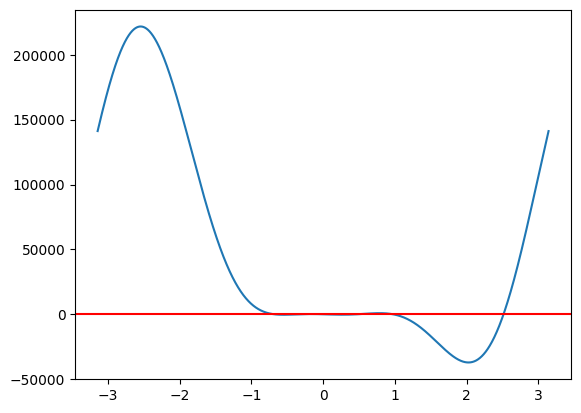

In [ ]:
#part 5 presets
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p2 = 7
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

def ans(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  x = N1/D
  y = N2/D
  return [x,y]

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)
plt.plot(x,y)
plt.axhline(color='red')

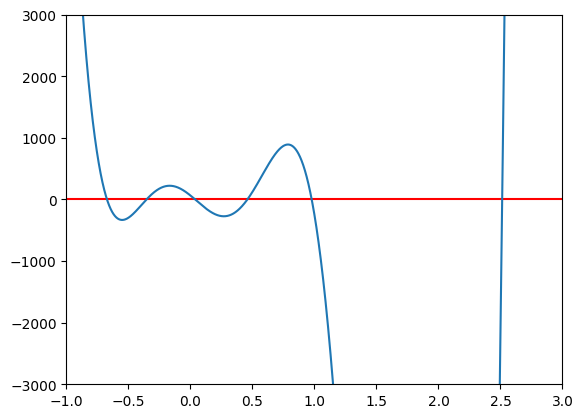

In [ ]:
plt.xlim(-1,3)
plt.ylim(-3000,3000)
plt.axhline(color='red')
plt.plot(x,y)

the solution theta = -0.6731574863716645 corrosponds to x,y = [-4.314759599568275, 2.5264302084034296]
the solution theta = -0.35474027041567524 corrosponds to x,y = [-4.804896519074747, 1.383101384925695]
the solution theta = 0.03776676057591365 corrosponds to x,y = [-4.949024616818954, 0.7121483989450558]
the solution theta = 0.45887818104898936 corrosponds to x,y = [-0.819800169066237, 4.932334911864661]
the solution theta = 0.9776728950003626 corrosponds to x,y = [2.3035540991463486, 4.4377515153854725]
the solution theta = 2.513852799350385 corrosponds to x,y = [3.21569603615108, 3.828746400988479]
[-4.314759599568275, 2.5264302084034296]
[-4.804896519074747, 1.383101384925695]
[-4.949024616818954, 0.7121483989450558]
[-0.819800169066237, 4.932334911864661]
[2.3035540991463486, 4.4377515153854725]
[3.21569603615108, 3.828746400988479]
For 1th root - p1: 4.999999999999997, p2: 6.999999999999998, p3: 2.999999999999995, delta_p1: 3.0000000000000004
For 2th root - p1: 5.00000000000000

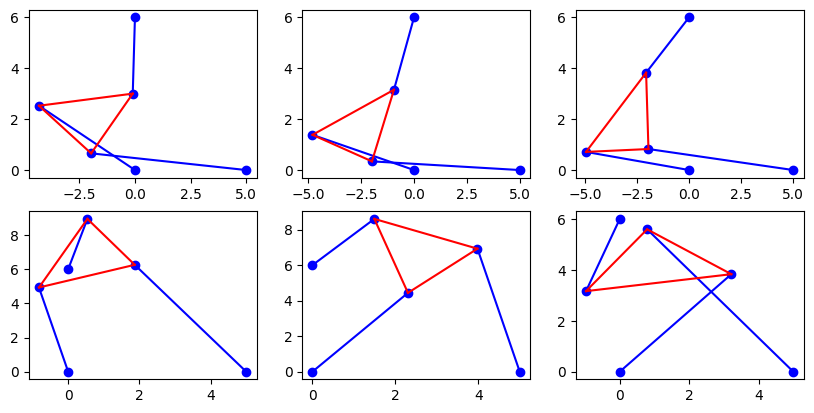

In [ ]:
solutions = []
solutions.append(bisection(f,-1.0,-0.5,200)[0])
solutions.append(bisection(f,-0.5,0.0,200)[0])
solutions.append(bisection(f,-0.1,0.4,200)[0])
solutions.append(bisection(f,0.4,0.9,200)[0])
solutions.append(bisection(f,0.9,1.4,200)[0])
solutions.append(bisection(f,2.25,2.75,200)[0])

for i in range(6):
  athand = solutions[i]
  print("the solution theta = " + str(athand) + " corrosponds to x,y = " + str(ans(athand)))


plt.figure().set_figwidth(10)

for i in range(6):
  th = solutions[i]
  xy = ans(th)
  x = xy[0]
  y = xy[1]
  points = [[0,0],[x1,0],[x2,y2],[x,y],[x+L3*cos(th),y+L3*sin(th)],[x+L2*cos(th+gamma),y+L2*sin(th+gamma)]]

  plt.subplot(2,3,i+1)

  plt.plot(*zip(*points), 'bo')

  plt.plot([0,x],[0,y], color = "blue")
  plt.plot([x1,x+L3*cos(th)],[0,y+L3*sin(th)], color = "blue")
  plt.plot([x2,x+L2*cos(th+gamma)],[y2,y+L2*sin(th+gamma)], color = "blue")

  plt.plot([x,x+L3*cos(th)],[y,y+L3*sin(th)], color="red")
  plt.plot([x+L3*cos(th),x+L2*cos(th+gamma)],[y+L3*sin(th),y+L2*sin(th+gamma)], color="red")
  plt.plot([x,x+L2*cos(th+gamma)],[y,y+L2*sin(th+gamma)], color="red")
  print(xy)

for i in range(6):
  th = solutions[i]
  xy = ans(th)
  x = xy[0]
  y = xy[1]

  p1 = sqrt(x**2+y**2) #p1
  p2 = sqrt((y+L3*sin(th))**2 + (x+L3*cos(th)-x1)**2) #p2
  p3 = sqrt((y+L2*sin(th+gamma)-y2)**2 + (x+L2*cos(th+gamma)-x2)**2) #p3

  y = [y+L3*sin(th),y+L2*sin(th+gamma)]
  x = [x+L3*cos(th),x+L2*cos(th+gamma)]
  delta_p1 = sqrt((y[0]-y[1])**2 + (x[0]-x[1])**2)
  print("For {0}th root - p1: {1}, p2: {2}, p3: {3}, delta_p1: {4}".format(i+1, p1, p2, p3, delta_p1))

the first, second, and sixth solutions are unphysical. The rest are physical. This concludes part 5 of the project.


In general we can change the number of solutions by changing the starting configuration. For instance if we use the previous configuration but change p2 to be 4:

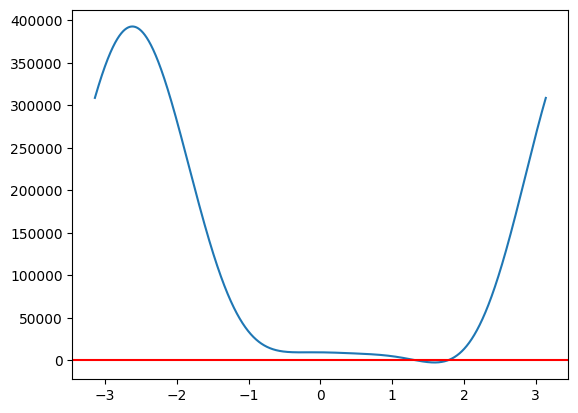

In [ ]:
#part 6 presets, p2=4
gamma = pi/4
L1 = L3 = 3
L2 = 3*sqrt(2)
p1 = 5
p2 = 4
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

def ans(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  x = N1/D
  y = N2/D
  return [x,y]

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.plot(x,y)
plt.axhline(color='red')


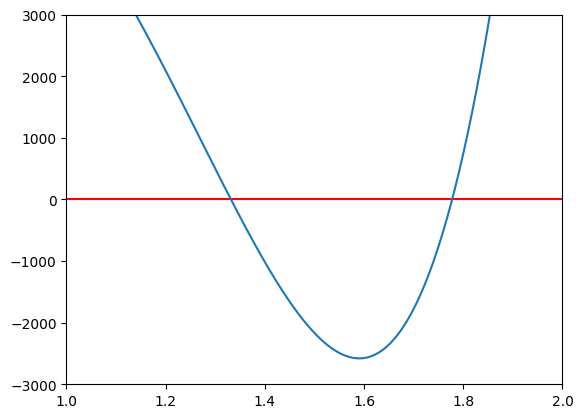

In [ ]:
plt.xlim(1,2)
plt.ylim(-3000,3000)
plt.axhline(color='red')
plt.plot(x,y)

the solution theta = 1.331642203342784 corrosponds to x,y = [4.890658973005098, 1.0399301946595856]
the solution theta = 1.7775135743998542 corrosponds to x,y = [4.899151197793508, 0.999158416447784]
[4.890658973005098, 1.0399301946595856]
[4.899151197793508, 0.999158416447784]
For 1th root - p1: 5.0, p2: 4.0, p3: 3.0, delta_p1: 3.0000000000000004
For 2th root - p1: 5.0, p2: 4.0, p3: 2.9999999999999996, delta_p1: 3.0000000000000004


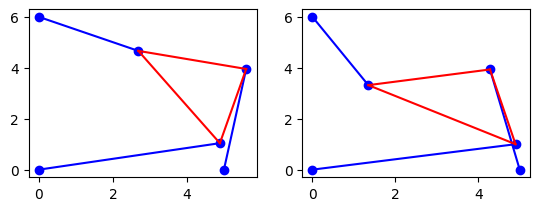

In [ ]:
#roots and poses for p2=4

solutions = []
solutions.append(bisection(f,1.0,1.5,200)[0])
solutions.append(bisection(f,1.5,2.0,200)[0])

for i in range(2):
  athand = solutions[i]
  print("the solution theta = " + str(athand) + " corrosponds to x,y = " + str(ans(athand)))


plt.figure().set_figwidth(10)

for i in range(2):
  th = solutions[i]
  xy = ans(th)
  x = xy[0]
  y = xy[1]
  points = [[0,0],[x1,0],[x2,y2],[x,y],[x+L3*cos(th),y+L3*sin(th)],[x+L2*cos(th+gamma),y+L2*sin(th+gamma)]]

  plt.subplot(2,3,i+1)

  plt.plot(*zip(*points), 'bo')

  plt.plot([0,x],[0,y], color = "blue")
  plt.plot([x1,x+L3*cos(th)],[0,y+L3*sin(th)], color = "blue")
  plt.plot([x2,x+L2*cos(th+gamma)],[y2,y+L2*sin(th+gamma)], color = "blue")

  plt.plot([x,x+L3*cos(th)],[y,y+L3*sin(th)], color="red")
  plt.plot([x+L3*cos(th),x+L2*cos(th+gamma)],[y+L3*sin(th),y+L2*sin(th+gamma)], color="red")
  plt.plot([x,x+L2*cos(th+gamma)],[y,y+L2*sin(th+gamma)], color="red")
  print(xy)

for i in range(2):
  th = solutions[i]
  xy = ans(th)
  x = xy[0]
  y = xy[1]

  p1 = sqrt(x**2+y**2) #p1
  p2 = sqrt((y+L3*sin(th))**2 + (x+L3*cos(th)-x1)**2) #p2
  p3 = sqrt((y+L2*sin(th+gamma)-y2)**2 + (x+L2*cos(th+gamma)-x2)**2) #p3

  y = [y+L3*sin(th),y+L2*sin(th+gamma)]
  x = [x+L3*cos(th),x+L2*cos(th+gamma)]
  delta_p1 = sqrt((y[0]-y[1])**2 + (x[0]-x[1])**2)
  print("For {0}th root - p1: {1}, p2: {2}, p3: {3}, delta_p1: {4}".format(i+1, p1, p2, p3, delta_p1))

There are now only two solutions, one being physical and other unphysical. To understand this, we have to find what values of p2 give us a given number of roots. We can first observe that p2 only ever shows up squared, meaning that we only have to check positive values (the number of roots for a negative p2 value will be the same as the corresponding absolute value)



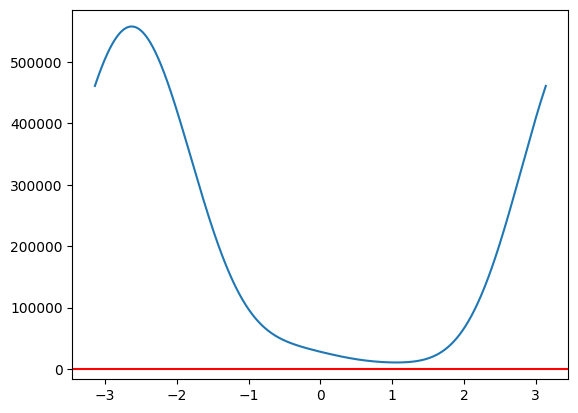

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p2 = 0
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.plot(x,y)
plt.axhline(color='red')

from p2=0 to about 3.2 there are no roots.

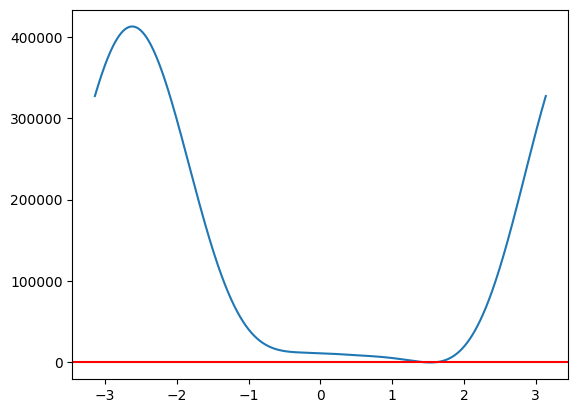

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p2 = 3.7106
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.plot(x,y)
plt.axhline(color='red')

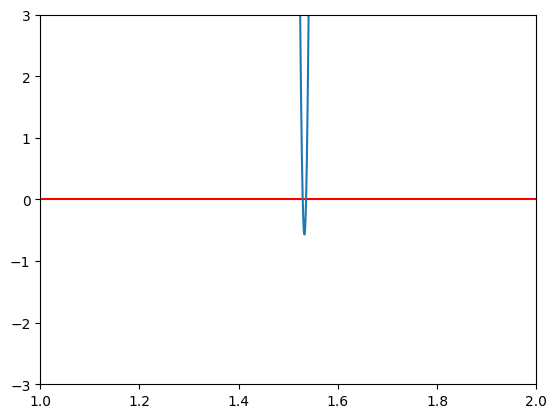

In [ ]:
plt.xlim(1,2)
plt.ylim(-3,3)
plt.axhline(color='red')
plt.plot(x,y)

p2 = 3.7106 is about where it gets its first two roots. We can make this more precise by incrementing p2 until the function goes negative. To aid in this, let's make a helper function that creates our function with a given p2 value:

In [ ]:

def fmaker(p2):
  gamma = pi/4
  L1 = 3
  L2 = 3*sqrt(2)
  L3 = L1
  p1 = 5

  p3 = 3
  x1 = 5
  x2 = 0
  y2 = 6
  def f(theta):
    St = sin(theta)
    Ct = cos(theta)
    Sg = sin(theta+gamma)
    Cg = cos(theta+gamma)
    A2 = L3*Ct - x1
    B2 = L3*St
    A3 = L2*Cg - x2
    B3 = L2*Sg - y2
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
    D = 2*(A2*B3 - B2*A3)
    return N1**2 + N2**2 -(p1*D)**2
  return f

And now we can do our calculation

In [ ]:
p2 = 3.71
y = [0]
while min(y) >= 0:
  f = fmaker(p2)
  vecf = np.vectorize(f)
  x = np.arange(1.4,1.6,0.00001)
  y = vecf(x)
  p2 += 0.000001
print(p2)


3.7105330000000745


about 3.710533, and if we plot this:

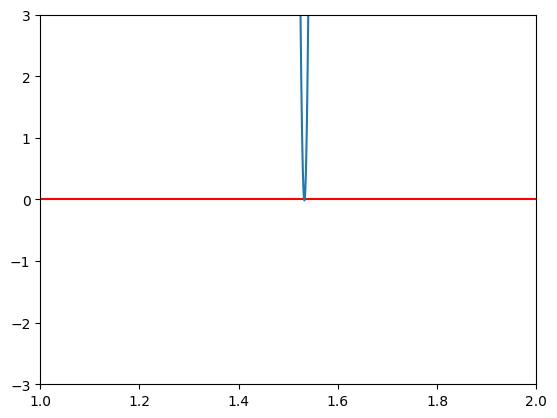

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p2 = 3.7105330000000745
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.xlim(1,2)
plt.ylim(-3,3)
plt.axhline(color='red')
plt.plot(x,y)

it just barely goes negative. For the next section, I will be finding all the points where the curve bufurcates across the x=0 line. In each case I will find an approximate solution by hand, and then use computer search to fine tune the solutions to save time.

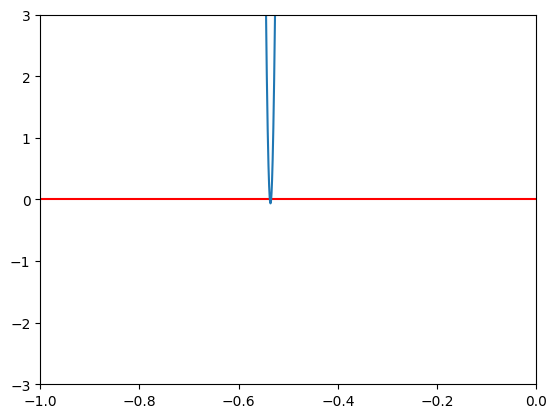

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 4.86373

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.xlim(-1,0)
plt.ylim(-3,3)
plt.axhline(color='red')
plt.plot(x,y)

In [ ]:
p2 = 4.86372
y = [0]
while min(y) >= 0:
  f = fmaker(p2)
  vecf = np.vectorize(f)
  x = np.arange(-0.6,-0.5,0.00001)
  y = vecf(x)
  p2 += 0.000001
print(p2)

4.8637250000000005


p2 = 4.863725 is about where it gets another two roots, total 4

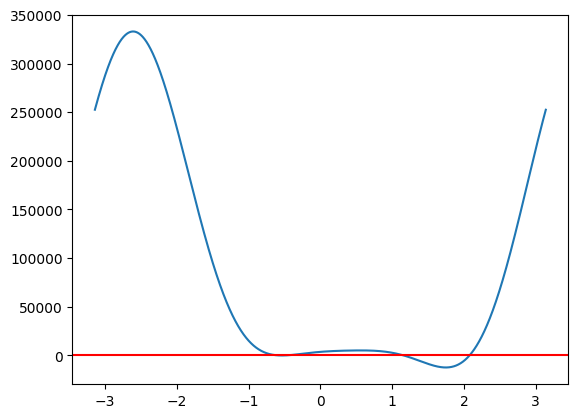

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 4.86379

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.plot(x,y)
plt.axhline(color='red')

(-30.0, 30.0)

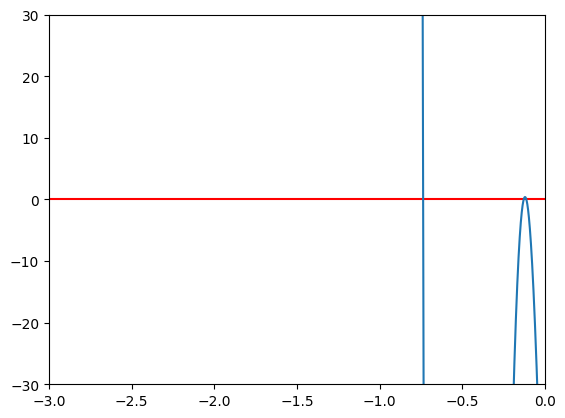

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 6.967408

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)


plt.axhline(color='red')
plt.plot(x,y)
plt.xlim(-3,0)
plt.ylim(-30,30)


the next two roots appear around p2 = 6.967408 (this guess was actually extremely good and computer search would take too long to improve it), for a total of six.

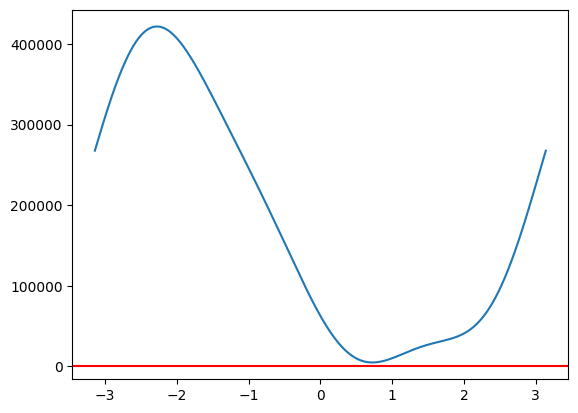

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 10

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.plot(x,y)
plt.axhline(color='red')

by the time we get to p2 = 10, we lose all our roots. When do we lose them?

(-3.0, 3.0)

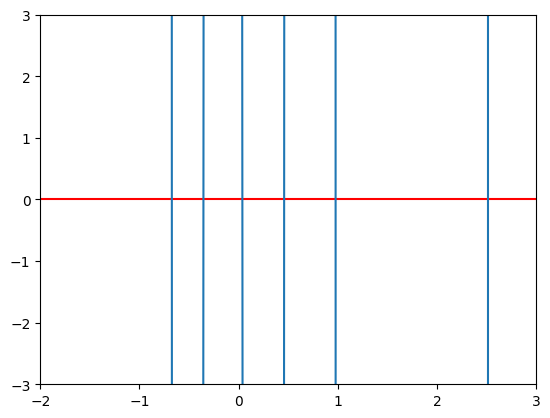

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 7

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.axhline(color='red')
plt.plot(x,y)
plt.xlim(-2,3)
plt.ylim(-3,3)

we still have 6 roots at p2 = 7

(-3.0, 3.0)

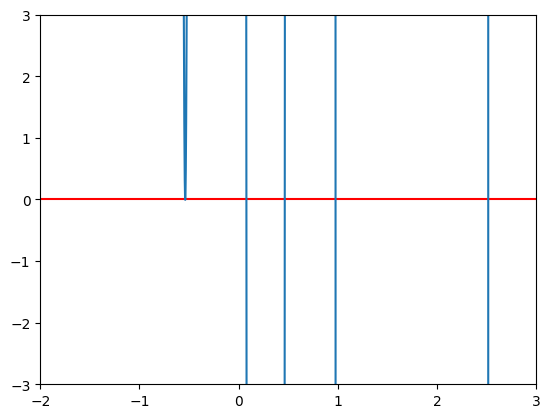

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 7.02234

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.axhline(color='red')
plt.plot(x,y)
plt.xlim(-2,3)
plt.ylim(-3,3)

In [ ]:
p2 = 7.02233
y = [-1]
while min(y) < 0:
  f = fmaker(p2)
  vecf = np.vectorize(f)
  x = np.arange(-1,-0.5,0.00001)
  y = vecf(x)
  p2 += 0.000001
print(p2)

7.022342000000002


we lose our first pair of roots at about p2 = 7.02234


(-3.0, 3.0)

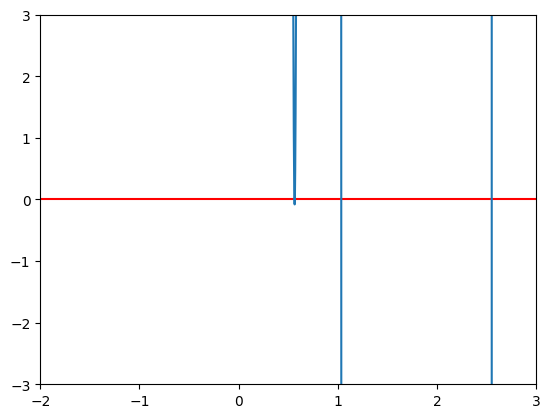

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 7.8489

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.axhline(color='red')
plt.plot(x,y)
plt.xlim(-2,3)
plt.ylim(-3,3)

In [ ]:
p2 = 7.8489
y = [-1]
while min(y) < 0:
  f = fmaker(p2)
  vecf = np.vectorize(f)
  x = np.arange(0.2,0.7,0.00001)
  y = vecf(x)
  p2 += 0.000001
print(p2)

7.849088000000027


we lose our next pair at about p2 = 7.8489088

(-3.0, 3.0)

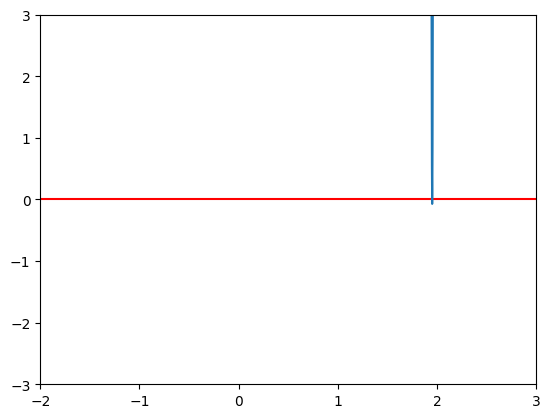

In [ ]:
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

p2 = 9.262381

def f(theta):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
x = np.arange(-pi,pi,0.0001)
y = vecf(x)

plt.axhline(color='red')
plt.plot(x,y)
plt.xlim(-2,3)
plt.ylim(-3,3)

In [ ]:
p2 = 9.262381
y = [-1]
while min(y) < 0:
  f = fmaker(p2)
  vecf = np.vectorize(f)
  x = np.arange(1.9,2.1,0.00001)
  y = vecf(x)
  p2 += 0.0000001
print(p2)

9.262382899999988


lastly, our last two roots are lost at about p2 = 9.2623828 and we never gain them back.

So there we have it! Very approximately, for [0, 3.710533] we have no roots, in [3.710533, 4.863725] we have two roots, then [4.863725, 6.967408] there's four roots, and then in [6.967408, 7.02234] there are six. [7.02234, 7.8489088] has four roots, [7.8489088, 9.2623828] gives us two, and [9.2623828, ∞) gives us none. negate all these intervals to get the respective intervals over the negatives. This concludes part 7 of the project.

Postscript: It may be more convinient and accurate to use an approach similar to that of the bisection method to find where the roots begin and end. We will do this in the following section.

In [ ]:
#bisection approach to activity 7
gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def fmaker(p2):
  def f(theta):
    St = sin(theta)
    Ct = cos(theta)
    Sg = sin(theta+gamma)
    Cg = cos(theta+gamma)
    A2 = L3*Ct - x1
    B2 = L3*St
    A3 = L2*Cg - x2
    B3 = L2*Sg - y2
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
    D = 2*(A2*B3 - B2*A3)
    return N1**2 + N2**2 -(p1*D)**2
  return f

def f(theta, p2):
  St = sin(theta)
  Ct = cos(theta)
  Sg = sin(theta+gamma)
  Cg = cos(theta+gamma)
  A2 = L3*Ct - x1
  B2 = L3*St
  A3 = L2*Cg - x2
  B3 = L2*Sg - y2
  N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
  N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
  D = 2*(A2*B3 - B2*A3)
  return N1**2 + N2**2 -(p1*D)**2

vecf = np.vectorize(f)
#bisection:
def bisection_for_intervals(f, p2_min, p2_max, theta_min, theta_max, iterations, up=True):
  domain = np.arange(theta_min, theta_max, 0.00001)
  intvl = [p2_min,p2_max]
  for i in range(iterations):
    if (intvl[1] - intvl[0] < 1e-15) :
      break
    p2_mid = sum(intvl)/2

    if(up):
      curr_min = np.min(vecf(domain, p2_mid))

      if curr_min < 0:
        intvl[1] = p2_mid
      else:
        intvl[0] = p2_mid
    else:
      curr_min = np.max((vecf(domain, p2_mid)))
      if curr_min > 0:
        intvl[1] = p2_mid
      else:
        intvl[0] = p2_mid

  return sum(intvl)/2


p2 = bisection_for_intervals(f, 3.7, 3.8, 1.4, 1.6, 50)
print(p2)

vecfu = np.vectorize(fmaker(p2))
x = np.arange(-pi,pi,0.0001)
y = vecfu(x)

plt.plot(x,y)
plt.axhline(color='red')

NameError: ignored

you can see how the result (3.71053114986259) is quite a bit more precise than 3.710533. We will do these for the rest of our roots and observe the results.

4.8637238547998916


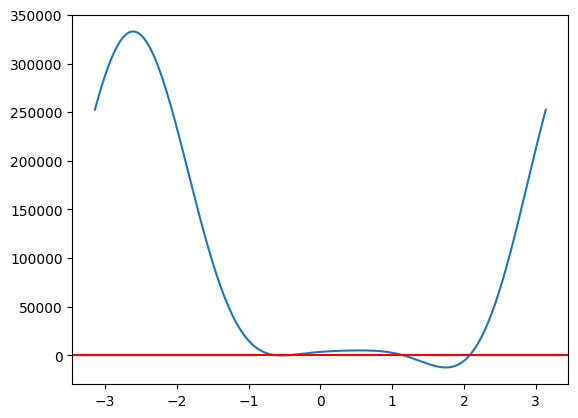

In [ ]:
#bisection approach to activity 7, 4 roots

vecf = np.vectorize(f)
p2 = bisection_for_intervals(f, 4.6, 4.9, -1, 0, 50)
print(p2)

vecfu = np.vectorize(fmaker(p2))
x = np.arange(-pi,pi,0.0001)
y = vecfu(x)

plt.plot(x,y)
plt.axhline(color='red')

4.8637238547998916 is an improvement on 4.863725, though less so than the previous example.

6.967343987486862


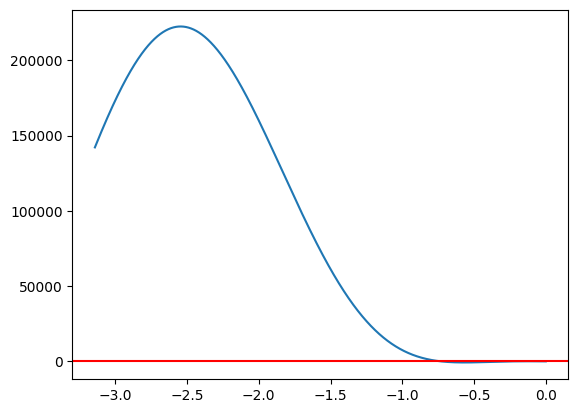

In [ ]:
#bisection approach to activity 7, 6 roots

vecf = np.vectorize(f)
p2 = bisection_for_intervals(f, 6.8, 7, -0.125, -0.11, 50,up=False)
print(p2)

vecfu = np.vectorize(fmaker(p2))
x = np.arange(-pi,0,0.0001)
y = vecfu(x)

plt.plot(x,y)
plt.axhline(color='red')

(-30.0, 30.0)

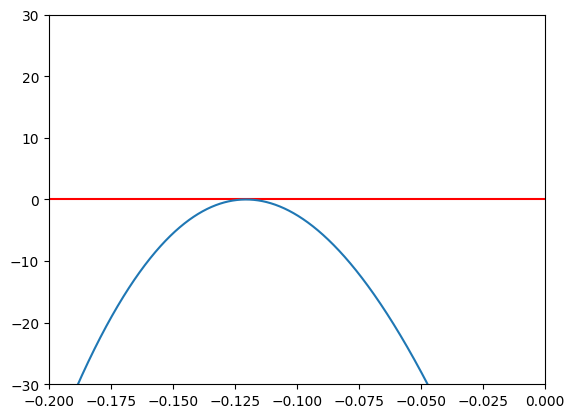

In [ ]:
plt.axhline(color='red')
plt.plot(x,y)
plt.xlim(-0.2,0)
plt.ylim(-30,30)

6.967343987486862 is a nice improvement over our previous result of 6.967408

7.0223404088186605


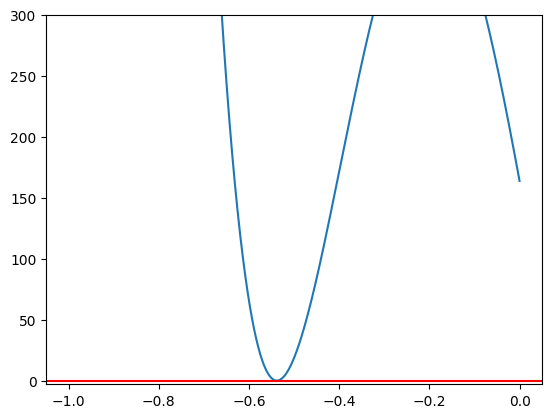

In [ ]:

#bisection, but for when we lose them:
def bisection_for_losses(f, p2_min, p2_max, theta_min, theta_max, iterations, up=True):
  domain = np.arange(theta_min, theta_max, 0.00001)
  intvl = [p2_min,p2_max]
  for i in range(iterations):
    if (intvl[1] - intvl[0] < 1e-15) :
      break
    p2_mid = sum(intvl)/2

    if(up):
      curr_min = np.min(vecf(domain, p2_mid))

      if curr_min < 0:
        intvl[0] = p2_mid
      else:
        intvl[1] = p2_mid
    else:
      curr_min = np.max((vecf(domain, p2_mid)))
      if curr_min > 0:
        intvl[0] = p2_mid
      else:
        intvl[1] = p2_mid

  return sum(intvl)/2

p2 = bisection_for_losses(f, 7, 7.1, -0.6, -0.4, 50)
print(p2)

vecfu = np.vectorize(fmaker(p2))
x = np.arange(-1,0,0.0001)
plt.ylim(-3,300)
y = vecfu(x)

plt.plot(x,y)
plt.axhline(color='red')


7.02234 was a very good estimation for 7.0223404088186605.

7.8490869244368895


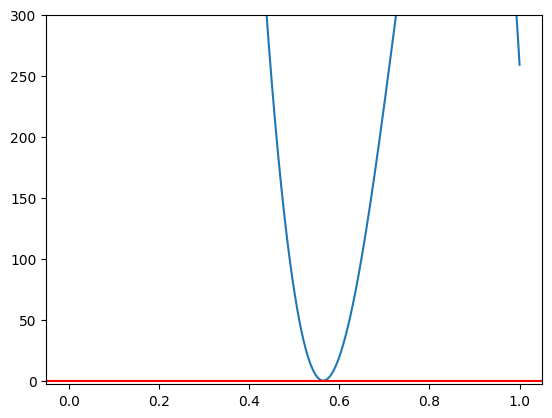

In [ ]:
p2 = bisection_for_losses(f, 7.8, 7.9, 0.4, 0.6, 50)
print(p2)

vecfu = np.vectorize(fmaker(p2))
x = np.arange(0,1,0.0001)
plt.ylim(-3,300)
y = vecfu(x)

plt.plot(x,y)
plt.axhline(color='red')

7.8489088 was a somewhat less good approximation, it seems, with the true value being closer to 7.8490869244368895.

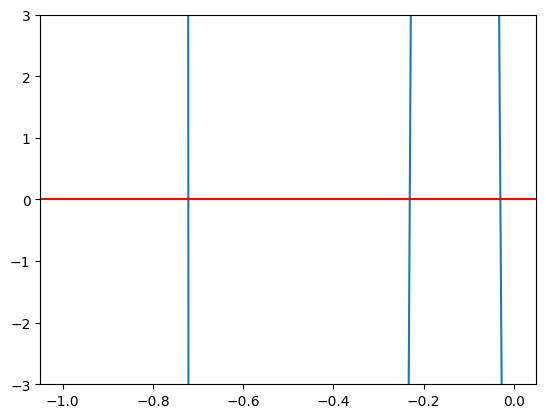

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi, sin, cos, sqrt

gamma = pi/4
L1 = 3
L2 = 3*sqrt(2)
L3 = L1
p1 = 5
p3 = 3
x1 = 5
x2 = 0
y2 = 6

def fmaker(p2):
  def f(theta):
    St = sin(theta)
    Ct = cos(theta)
    Sg = sin(theta+gamma)
    Cg = cos(theta+gamma)
    A2 = L3*Ct - x1
    B2 = L3*St
    A3 = L2*Cg - x2
    B3 = L2*Sg - y2
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = A2*(p3**2 - p1**2 - A3**2 - B3**2) - A3*(p2**2 - p1**2 - A2**2 - B2**2)
    D = 2*(A2*B3 - B2*A3)
    return N1**2 + N2**2 -(p1*D)**2
  return f

vecfu = np.vectorize(fmaker(6.977))
x = np.arange(-1, 0,0.0001)
plt.ylim(-3,3)
y = vecfu(x)

plt.plot(x,y)
plt.axhline(color='red')

9.2623828 was a decent estimation as well, with the true value being 9.26238273632472. The error for these results could probably be improved by using a finer dot width for the test intervals (i.e. instead of our domain being

`np.arange(theta_min, theta_max, 0.00001)`

we could make it

`np.arange(theta_min, theta_max, 0.00000001)` or even higher. Alternatively, implementing a root finding algorithm which doesn't break if there are more than one root, such as the secant method, might make this supurfluous and improve performance. Either way, exact error is hard to reason about but it is likely not far less than what could theoretically be achieved with double precision floating point numbers.

In [ ]:
#this gives an approximation of the roots
theta_range = np.arange(-pi, pi, 0.001)
vecf = np.vectorize(f)

def count_roots(f, theta_range, p2):
  y = vecf(theta_range, p2)
  num_changes = 0
  prev_sign = np.sign(y[0])
  theta_roots = []

  for i in range(1, len(y)):
    curr_sign = np.sign(y[i])
    if curr_sign != prev_sign:
      num_changes += 1
      prev_sign = curr_sign
      theta_roots.append((theta_range[i], len(theta_roots)+1))

  return num_changes, theta_roots

def find_intervals(f, p2_min, p2_max, theta_range):
  intervals = []
  theta_roots = []
  intvl_min = p2_min
  intvl = [p2_min, p2_max]

  prev_roots = count_roots(f, theta_range, intvl_min)[0]
  for p2 in np.arange(p2_min, p2_max + 1e-3, 1e-3):
    curr_roots, theta_roots_current = count_roots(f, theta_range, p2)

    if curr_roots != prev_roots:
      intervals.append((intvl_min, p2))
      intvl_min = p2
      prev_roots = curr_roots

      theta_roots.append(theta_roots_current)

  return intervals, theta_roots

intervals, theta_roots = find_intervals(f, 0, 15, theta_range)

NameError: ignored

In [ ]:
def g(x):
  return x**2 - x - 6

print(derivative(g,1,1e-10))

from math import nan
def derivative(f, x, delta):
  return (f(x+delta) - f(x))/delta

def newton(f, rt, max_its):
  for i in range(max_its):
    fprime = derivative(f, rt, 1e-10)
    ef = f(rt)
    if(abs(ef) < 1e-10):
      return rt
    rt = rt - ef/fprime

  return float('inf')

1.000000082740371


In [ ]:
newton(g, 2.6, 100)

3.000000000000001